<a href="https://colab.research.google.com/github/Amitparikh1/NFL-ML-Predictor/blob/master/NFL_ML_Score_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sportsreference
!pip install scikit-learn

     |████████████████████████████████| 481kB 8.8MB/s 


Imports

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sportsreference.nfl
from sportsreference.nfl.teams import Teams
from sportsreference.nfl.schedule import Schedule
from sportsreference.nfl.boxscore import Boxscore
from sklearn.linear_model import LinearRegression,Ridge

Get Data

In [ ]:
## Initialize Data Frame
columns = ["Team","Week","AvgPointsScored","AvgPassYards","AvgRushYards","AvgInterceptions","AvgTimesSacked","OppPointsAllowed","OppPassYards","OppRushYards","OppInterceptions","OppSacks","Points"]

df = pd.DataFrame(columns=columns)

teams = Teams()
counter = 0
predictionWeek = 17 ##THIS VARIABLE IS THE WEEK TO PREDICT FOR
## Loop through each team
for team in teams:
  schedule = Schedule(team.abbreviation)
  ## Variables to store total data about the offense
  totPointsScored = 0
  totPassYards = 0
  totRushYards = 0
  totInterceptions = 0
  totTimesSacked = 0
  team = team.abbreviation
  ## Loop through each week 
  for game in schedule:
    if (game.week<=predictionWeek):
      opposing_schedule = Schedule(game.opponent_abbr)
      # Keep track of the opposing teams totals
      opp_points_allowed = 0
      opp_pass_yards = 0
      opp_rush_yards = 0
      opp_interceptions = 0
      opp_sacks = 0
      for opp_game in opposing_schedule:
        opp_boxscore = Boxscore(opp_game.boxscore_index)
        if (opp_game.week < game.week):
          if (game.opponent_abbr == opp_boxscore.winning_abbr):
            if (opp_boxscore.winner == "Home"):
              opp_points_allowed += opp_boxscore.away_points
              opp_pass_yards += opp_boxscore.away_net_pass_yards
              opp_rush_yards += opp_boxscore.away_rush_yards
              opp_interceptions += opp_boxscore.away_interceptions
              opp_sacks += opp_boxscore.away_times_sacked
            else:
              opp_points_allowed += opp_boxscore.home_points
              opp_pass_yards += opp_boxscore.home_net_pass_yards
              opp_rush_yards += opp_boxscore.home_rush_yards
              opp_interceptions += opp_boxscore.home_interceptions
              opp_sacks += opp_boxscore.home_times_sacked
          else:
            if (opp_boxscore.winner == "Home"):
              opp_points_allowed += opp_boxscore.home_points
              opp_pass_yards += opp_boxscore.home_net_pass_yards
              opp_rush_yards += opp_boxscore.home_rush_yards
              opp_interceptions += opp_boxscore.home_interceptions
              opp_sacks += opp_boxscore.home_times_sacked
            else:
              opp_points_allowed += opp_boxscore.away_points
              opp_pass_yards += opp_boxscore.away_net_pass_yards
              opp_rush_yards += opp_boxscore.away_rush_yards
              opp_interceptions += opp_boxscore.away_interceptions
              opp_sacks += opp_boxscore.away_times_sacked
          
      
      if (game.week == 1):
        totPointsScored += game.points_scored
        totPassYards += game.pass_yards
        totRushYards += game.rush_yards
        totInterceptions += game.interceptions
        totTimesSacked += game.times_sacked
        
      else:
        weekToDivide = game.week - 1
        
        if (game.week is not predictionWeek):
          df.loc[counter]={"Team":team,"Week":game.week,"AvgPointsScored":totPointsScored/weekToDivide,"AvgPassYards":totPassYards/weekToDivide,"AvgRushYards":totRushYards/weekToDivide,"AvgInterceptions":totInterceptions/weekToDivide,"AvgTimesSacked":totTimesSacked/weekToDivide,"OppPointsAllowed":(opp_points_allowed/weekToDivide),"OppPassYards":(opp_pass_yards/weekToDivide),"OppRushYards":(opp_rush_yards/weekToDivide),"OppInterceptions":(opp_interceptions/weekToDivide),"OppSacks":(opp_sacks/weekToDivide),"Points":game.points_scored}
          totPointsScored += game.points_scored
          totPassYards += game.pass_yards
          totRushYards += game.rush_yards
          totInterceptions += game.interceptions
          totTimesSacked += game.times_sacked
        else: ##Put "-1" in points column if the game hasn't been played yet
          df.loc[counter]={"Team":team,"Week":game.week,"AvgPointsScored":totPointsScored/weekToDivide,"AvgPassYards":totPassYards/weekToDivide,"AvgRushYards":totRushYards/weekToDivide,"AvgInterceptions":totInterceptions/weekToDivide,"AvgTimesSacked":totTimesSacked/weekToDivide,"OppPointsAllowed":(opp_points_allowed/weekToDivide),"OppPassYards":(opp_pass_yards/weekToDivide),"OppRushYards":(opp_rush_yards/weekToDivide),"OppInterceptions":(opp_interceptions/weekToDivide),"OppSacks":(opp_sacks/weekToDivide),"Points":-1}
        print(counter+1)
        counter +=1
## Save to dataframe 
df.to_csv("nfl_data.csv")  

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


Split data up into x,y, train and test

In [ ]:
def splitData(data,week):
  train = data.loc[data['Week']<week]
  test = data.loc[data['Week']==week]
  x_train = train.iloc[:,2:12]
  y_train = train.iloc[:,12]
  x_test = test.iloc[:,2:12]
  y_test = test.iloc[:,12]
  return x_train,y_train,x_test,y_test


Regression Models

In [ ]:
def linear_regression(x_train,y_train,x_test,y_test):
  linear_regressor = LinearRegression()
  linear_regressor.fit(x_train,y_train)
  score_predictions = linear_regressor.predict(x_test)
  print("Linear:")
  print(linear_regressor.score(x_test,y_test))
  return score_predictions

## Ridge regression is used when variables may have multicollinearity which should be the case for variables such as passing yards and points scored etc.  
def ridge_regression(x_train,y_train,x_test,y_test):
  ridge_regressor = Ridge(alpha=100)
  ridge_regressor.fit(x_train,y_train)
  score_predictions = ridge_regressor.predict(x_test)
  print("Ridge:")
  print(ridge_regressor.score(x_test,y_test))
  return score_predictions


Compare Predictions to Actual Results

In [ ]:
def deviation(score_predictions,y_test):
  ## Standard Deviation
  count = 0
  std_sum = 0
  for i in range(len(score_predictions)):
    std_sum += abs(score_predictions[i]-y_test.iloc[i])
    count+=1
  return (std_sum/count)
  #print("Standard deviation of predicted scores from actual scores for week "+str(week) +" is "+str((std_sum/count)))

Run Code

In [ ]:
season_data = pd.read_csv("nfl_data.csv",index_col=None)
season_data = season_data.iloc[:,1:14]
linear_std_deviations = []
ridge_std_deviations = []
count = 0
for i in range(3,predictionWeek):
  xTr,yTr,xTe,yTe = splitData(season_data,i)
  linear_predictions = linear_regression(xTr,yTr,xTe,yTe)
  ridge_predictions = ridge_regression(xTr,yTr,xTe,yTe)
  linear_std_deviations.append(deviation(linear_predictions,yTe))
  ridge_std_deviations.append(deviation(ridge_predictions,yTe))

print(linear_std_deviations)
print(ridge_std_deviations)

Linear:
0.06691744943632594
Ridge:
0.2117155567565413
Linear:
-0.17915874752228111
Ridge:
-0.13457566179848168
Linear:
-0.05220242992493928
Ridge:
-0.05431944453835058
Linear:
-0.0343747709225779
Ridge:
-0.03593490551815148
Linear:
0.08390491580929638
Ridge:
0.07956863817548931
Linear:
-0.1546187438684876
Ridge:
-0.16456865191623926
Linear:
0.054148987808969484
Ridge:
0.04278826995467311
Linear:
0.07173732296167756
Ridge:
0.05502787080860516
Linear:
0.0791661219231593
Ridge:
0.06613913102436253
Linear:
0.07314718232624229
Ridge:
0.06323869085746392
Linear:
0.10399409061031305
Ridge:
0.09111066236247933
Linear:
0.10909344363141638
Ridge:
0.1131740342771449
Linear:
0.09365544924589708
Ridge:
0.09555313791274711
Linear:
0.09196260756745334
Ridge:
0.08482674817685332
[6.645169124180003, 8.156575564248557, 8.491245724870444, 9.246551505021971, 7.806401417300146, 6.49189741895664, 6.417658834561151, 7.54632276676691, 6.600023429447652, 7.4822992366881325, 7.386778072776873, 8.669996816990572

Plots

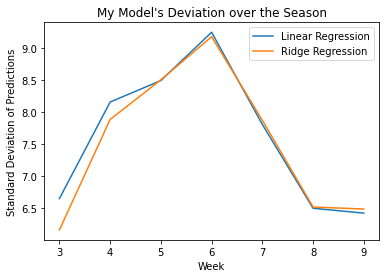

In [ ]:
## Line Graph of Standard Deviations
plt.plot(range(3,predictionWeek),linear_std_deviations,label='Linear Regression')
plt.plot(range(3,predictionWeek),ridge_std_deviations,label='Ridge Regression')
plt.xlabel("Week")
plt.ylabel("Standard Deviation of Predictions")
plt.title("My Model's Deviation over the Season")
plt.legend()
plt.show()

Ridge:
0.2117155567565413
Ridge:
-0.13457566179848168
Ridge:
-0.05431944453835058
Ridge:
-0.03593490551815148
Ridge:
0.07956863817548931
Ridge:
-0.16456865191623926
Ridge:
0.04278826995467311
Ridge:
0.05502787080860516
Ridge:
0.06613913102436253
Ridge:
0.06323869085746392
Ridge:
0.09111066236247933
Ridge:
0.1131740342771449
Ridge:
0.09555313791274711
Ridge:
0.08482674817685332


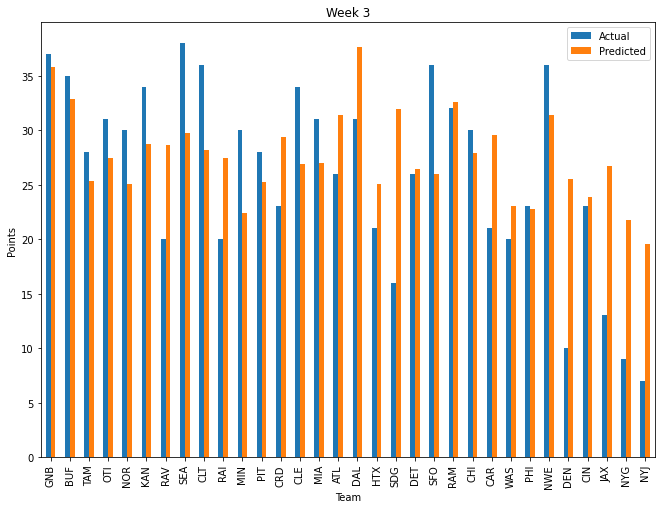

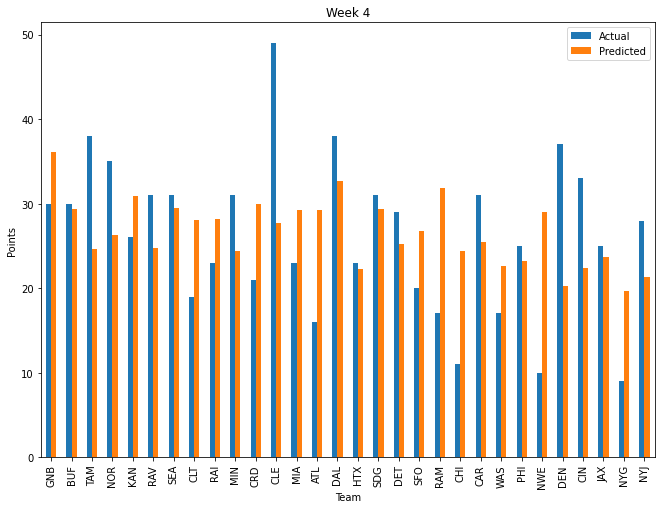

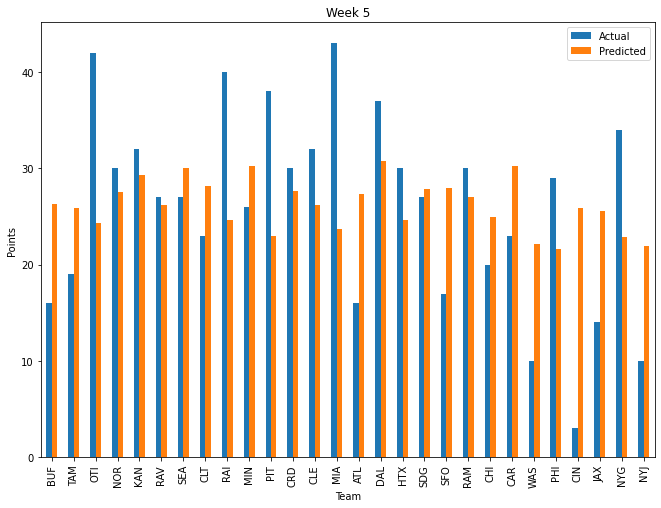

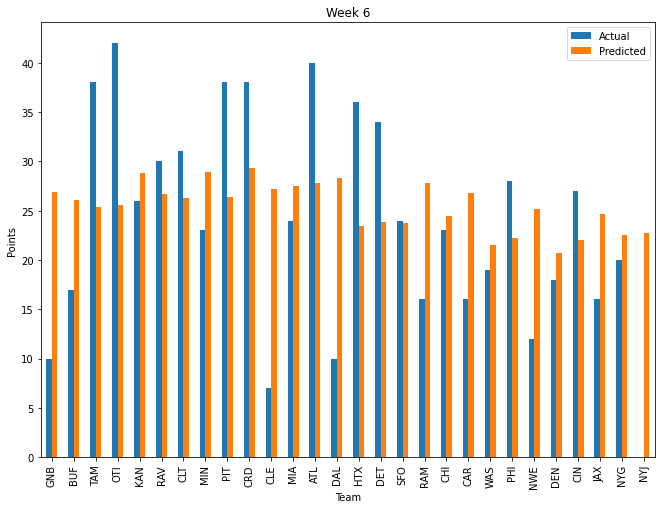

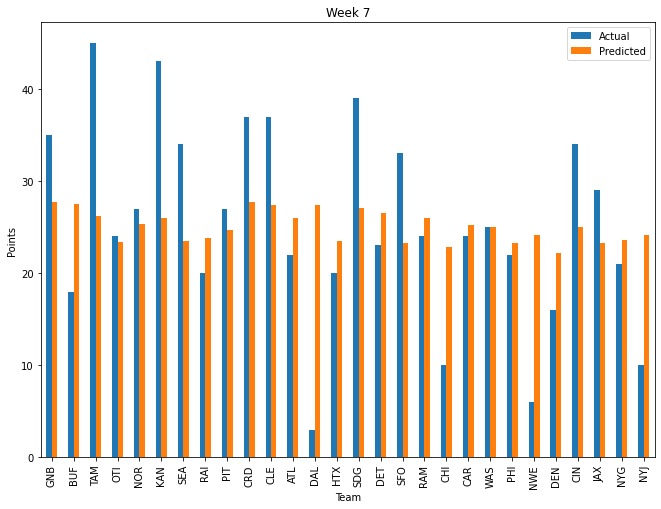

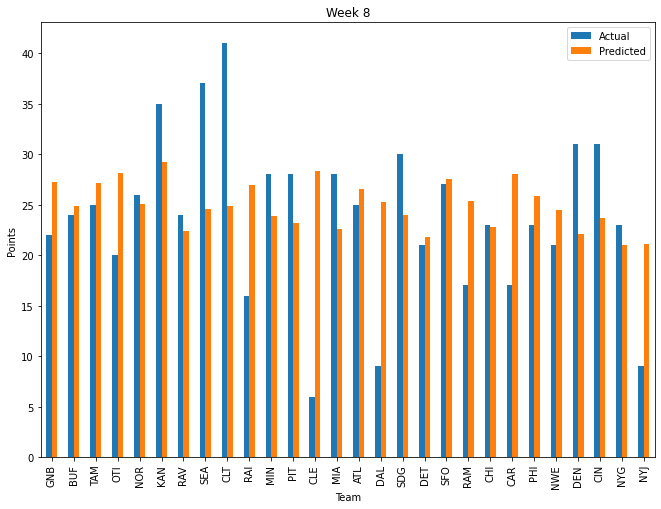

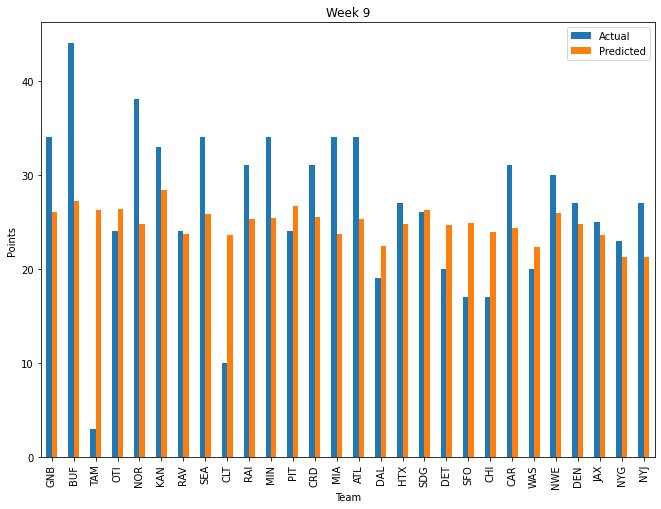

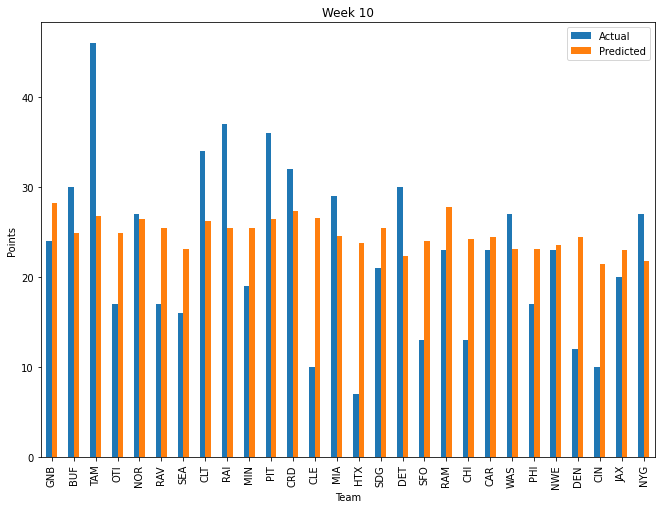

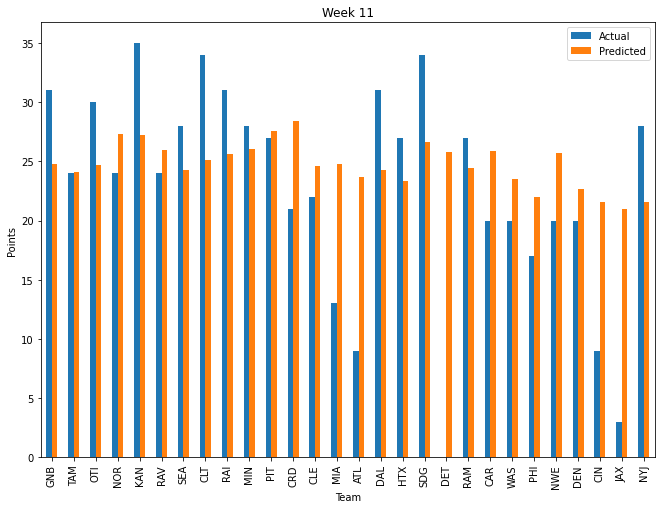

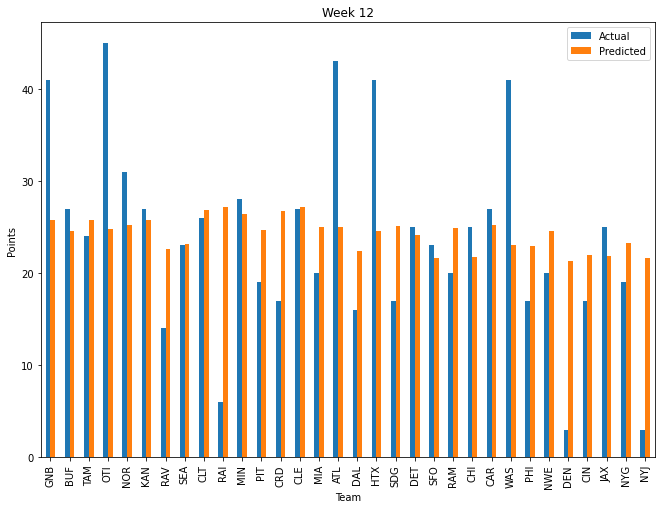

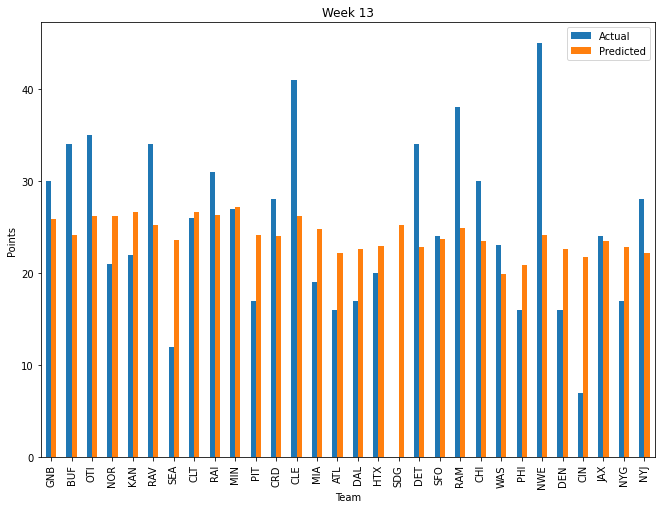

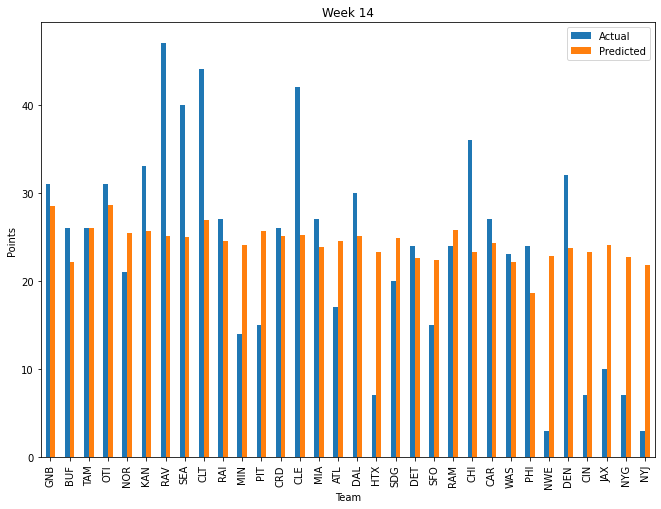

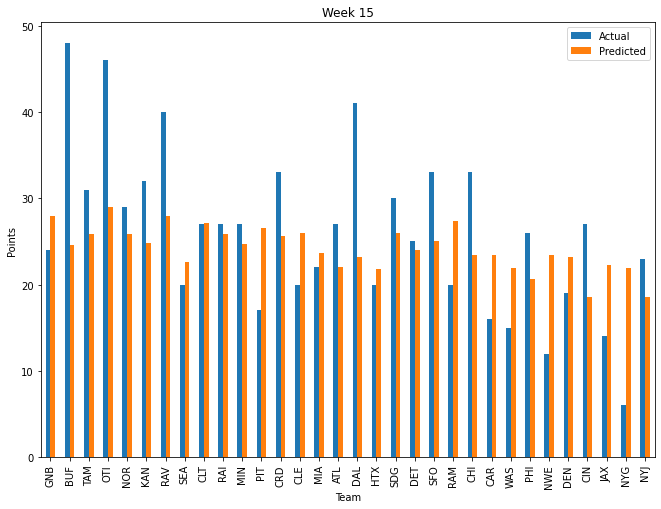

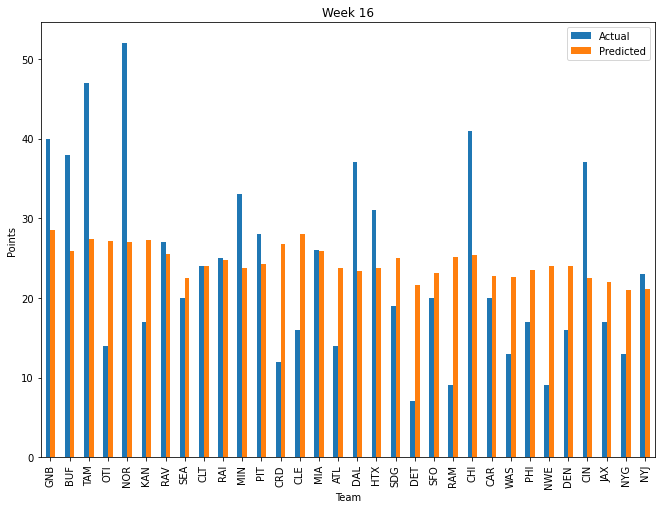

In [ ]:
##Side by side histogram of predictions and actual scores for ridge regression
hist_df = season_data[['Team','Week','Points']]
hist_df = hist_df.rename(columns={"Points":"Actual"})
for i in range(3,predictionWeek):
  week_df = hist_df.loc[hist_df['Week']==i]
  xTr,yTr,xTe,yTe = splitData(season_data,i)
  predictions = ridge_regression(xTr,yTr,xTe,yTe)
  week_df.insert(3,"Predicted",predictions,True)
  this_week = week_df.loc[week_df['Week']==i]
  this_week.plot.bar(x='Team',y=['Actual','Predicted'])
  plt.ylabel("Points")
  plt.title("Week "+str(i))
  fig = plt.gcf()
  fig.set_size_inches(11,8)
  
